![Knock airport banner](img/assignment6.png)

# Assignment 6: Knock Airport Weather Analysis

Plot:

- The temperature
- The mean temperature of each day
- The mean temperature of each month
- The wind speed
- The rolling wind speed (over 24 hours)
- The max wind speed for each day
- The monthly mean of the daily max wind speeds

Author: Irene Kilgannon

In [1]:
# Import the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

## Background Information on the Data Set.

![Met Éireann logo](img/met_eireann.png)

The downloaded csv file, [hly4935.csv](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv) has hourly weather information for Knock Airport, Co. Mayo, Ireland from April 1996 to October 2024. The data is published by Met Éireann, the meteorological service of Ireland. 

Each weather station has a unique station name and the naming system of the csv file reflects the data downloaded. For this file, hly4935.csv, hly indicates hourly data and 4935 is the station code for Knock Airport.

This [link](https://cli.fusio.net/cli/climate_data/showdata.php) is to view and download weather data for other weather stations. It is possible to download hourly, daily or monthly weather data for every weather station. 

## Loading the csv File into Pandas

Difficulties loading the csv file into pandas were due to:

- the first twenty three rows of the csv file have information on the Knock Weather Station along with a description of the columns. 

    This was easily solved using the skiprows parameter of the read_csv() function.

- missing data in the csv file is indicated with a whitespace, ' '.

    The missing data was not read into pandas as NaN as expected. To clean the csv file, find and replace in Visual Studio Code was used. To remove the space, each ', ' (or the regex expression ',\s') was replaced with ','. This method modifies the csv file. 

![Find and replace for csv](img/assignment_6_regex.png)

In the pandas [read_csv() documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) I subsequently found an alternative method. Certain values are automatically interpreted as NaN by Pandas. These are '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'None', 'n/a', 'nan' and 'null '. Unfortunately, whitespace, ' ' is not one of them. The read_csv() function has a parameter, [na_values](https://www.geeksforgeeks.org/use-of-na_values-parameter-in-read_csv-function-of-pandas-in-python/) which allows the user to list additional strings to recognise as NaN. For this csv file, setting `na_values = ' '` would mean that the whitespace would be automatically recognised as NaN when the data set is loaded into pandas.

A third method was detailed in the [Week 7 labs](https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/labs/lab07.01-regression%20windspeed.pdf) of the Programming for Data Analytics module. This uses the [replace method](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html#pandas.Series.replace) as shown below.

```python
# Find all rows in the 'wdsp' column, replace ' ' with np.nan.
df['wdsp'] = df.loc[:, ('wdsp')].replace(' ', np.nan)
```

__Additional References__

https://sparkbyexamples.com/pandas/pandas-replace-blank-values-with-nan/

In [2]:
# Load the Data Set
# Loading only the date, temperature and wind speed columns as these are the columns required to complete the assignment.
# Parse the date column as datetime and set as the index. 
weather_df = pd.read_csv('data/hly4935.csv', 
                         usecols= ['date', 'temp', 'wdsp'], 
                         skiprows = 23,
                         index_col= 'date', 
                         parse_dates= ['date'], 
                         date_format = "%d-%b-%Y %H:%M")

# View the first five rows of the dataset.
weather_df.head()

,temp,wdsp
date,,
1996-04-10 14:00:00,11.5,0.0
1996-07-31 08:00:00,11.5,0.0
1996-07-31 09:00:00,11.6,0.0
1996-07-31 10:00:00,12.9,0.0
1996-07-31 11:00:00,14.5,0.0


## Exploratory Data Analysis

In [3]:
# Information on the data set. Check the data type, number of entries. 
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246930 entries, 1996-04-10 14:00:00 to 2024-10-01 00:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    246930 non-null  float64
 1   wdsp    246880 non-null  float64
dtypes: float64(2)
memory usage: 5.7 MB


In [4]:
# Summary Statistics
weather_df.describe()

,temp,wdsp
count,246930.000000,246880.000000
mean,8.763200,9.462387
std,4.609026,4.937889
min,-6.900000,0.000000
25%,5.400000,6.000000
50%,8.800000,9.000000
75%,12.000000,12.000000
max,28.500000,50.000000


In [5]:
# Shape attribute, no of rows and columns in the dataset
weather_df.shape

(246930, 2)

In [6]:
# Count the number of rows with data missing.
weather_df.isna().sum()

temp     0
wdsp    50
dtype: int64

This data set has almost 250,000 rows of weather information. 

There are only 50 rows with missing data, all of them in the wind speed column. These rows can be dropped as they are only a small number of rows in comparison with the size of the data set. 

In [7]:
# Drop the rows with missing data
weather_df.dropna(inplace= True)

In [8]:
# Change the data type of the wind speed column to integer. The data in the csv file is recorded as whole numbers.
weather_df['wdsp'] = weather_df['wdsp'].astype('int')
weather_df['wdsp'].dtype

dtype('int64')

In [9]:
# Set style of plots
plt.style.use(style= 'seaborn-v0_8')

## Task 1: Plot the Temperature

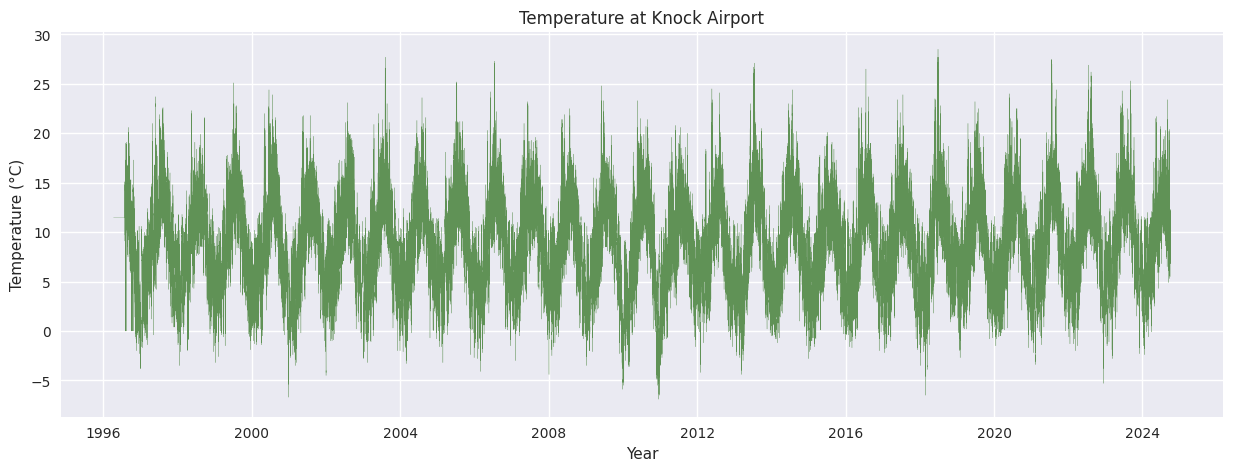

In [10]:
# Task 1: Plot the temperature.
fig, ax = plt.subplots(figsize = (15, 5))

# Plot the data in the temp column
plt.plot(weather_df['temp'], linewidth = 0.2, color = '#609256')

# Set the title and axis labels.
plt.title('Temperature at Knock Airport')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

# Display the plot
plt.show()

In [11]:
# Take a closer look. 
# Select the all the rows for the years 2010 and 2011
tens_weather_df = weather_df.loc['2010-01-01': '2012-01-01']

There was a [plot coloured by value](https://matplotlib.org/stable/gallery/color/color_by_yvalue.html#sphx-glr-gallery-color-color-by-yvalue-py) in the matplotlib documentation. I have replicated that code here.

The upper and lower temperature values were chosen from the results of describe(). Any temperature above 12°C (the 75th centile) will be coloured red and any temperature below 5.4°C (the 25th centile) will be green.

The use of AutoDateLocator and ConciseDateFormatter to format how the time and date are displayed on the x-axis were discussed in [assignment2-weather](https://github.com/IreneKilgannon/PFDA/blob/main/PFDA-assignments/assignment2-weather.ipynb).

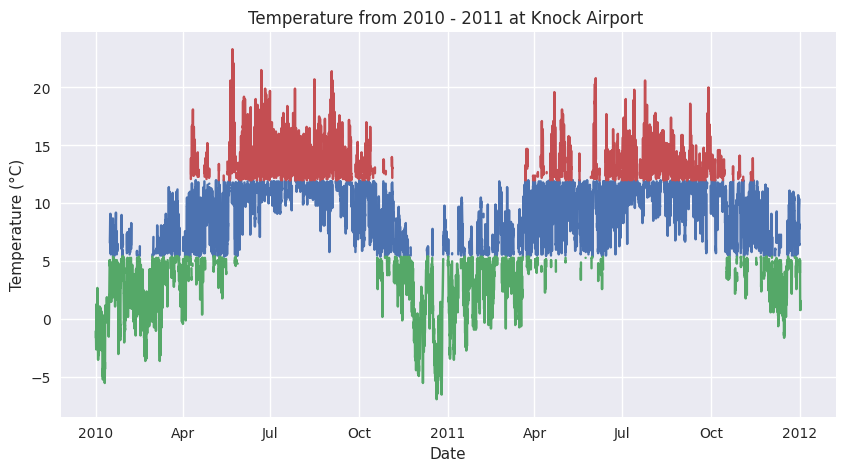

In [12]:
# Plot of the temperature from 2010 and 2011
fig, ax = plt.subplots(figsize = (10, 5))


# AutoDateLocator
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)

# ConciseDateFormatter 
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)

# Upper and lower limits chosen from the results of describe(). 
upper = 12
lower = 5.4

# Set the ranges
supper = np.ma.masked_where(tens_weather_df['temp'] < upper, tens_weather_df['temp'])
slower = np.ma.masked_where(tens_weather_df['temp'] > lower, tens_weather_df['temp'])
smiddle = np.ma.masked_where((tens_weather_df['temp'] < lower) | (tens_weather_df['temp'] > upper), tens_weather_df['temp'])

# Plot the data
plt.plot(tens_weather_df.index, smiddle, tens_weather_df.index, slower, tens_weather_df.index, supper)

# Label the x-axis, y-axis and title of plot
plt.title('Temperature from 2010 - 2011 at Knock Airport ')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Display the plot
plt.show()

## Task 2: Plot the Mean Temp Each Day

As there was no data recorded from 2pm on the 10th April 1996 to 8am on the 31st July 1996 the first row of data will be dropped.

In [13]:
# Drop the first row.
weather_df.drop('1996-04-10 14:00:00', inplace= True)

### Resampling the data

To adjust the frequency of the dates and times within the data the [resample() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) can be used. The resample() function groups data by a specified time interval e.g. by month or day and then applies one or more functions to each group. It is similar to the groupby() method for categorical data. Resample() can only be used if the index is of the data type datetime. This [blog on resample()](https://www.datacamp.com/tutorial/pandas-resample-asfreq?) explains how to use resample. 

After the data has been grouped by day, the mean of the daily temperatures can be calculated. 

In [14]:
# Use resample() to group weather_df to daily samples
daily = weather_df.resample('D')

In [15]:
# Get the daily mean temperature.
daily_mean_temp = daily['temp'].mean()
daily_mean_temp

date
1996-07-31    12.650000
1996-08-01    11.704348
1996-08-02    12.504167
1996-08-03    14.266667
1996-08-04    13.987500
                ...    
2024-09-27     8.291667
2024-09-28     8.479167
2024-09-29     9.183333
2024-09-30     9.891667
2024-10-01     8.200000
Freq: D, Name: temp, Length: 10290, dtype: float64

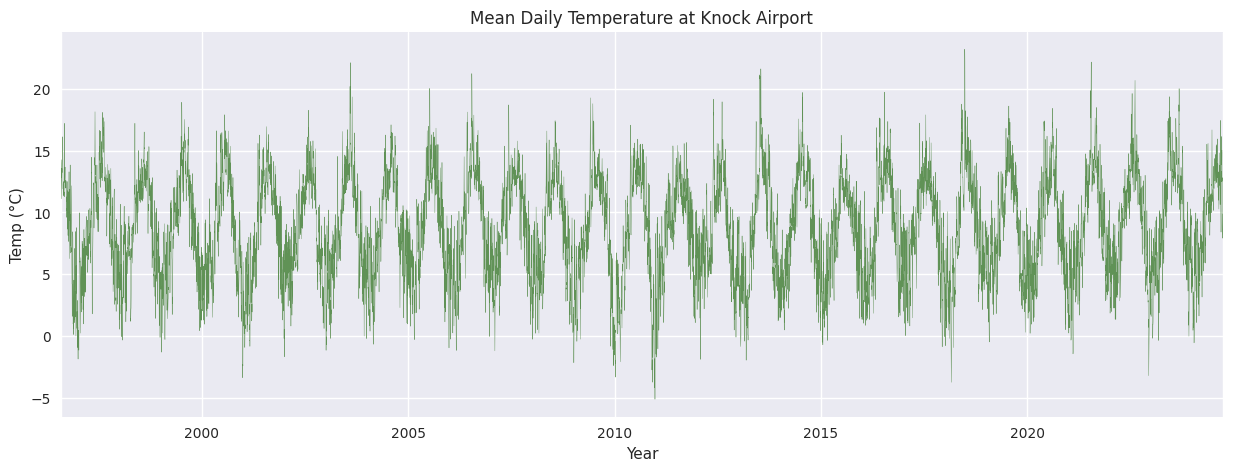

In [16]:
# Plot the daily mean temperature
fig, ax = plt.subplots(figsize = (15, 5))

# Plot the mean daily temperature
daily_mean_temp.plot(linewidth = 0.3, color = '#609256')

# Set the title and label the axis
plt.xlabel('Year')
plt.ylabel('Temp (°C)')
plt.title('Mean Daily Temperature at Knock Airport')

# Display the plot
plt.show()

In [17]:
# Selecting the day from the index
index_day = weather_df.index.day

# Aggregating weather_df by day
temp_by_day = weather_df.groupby(index_day)['temp'].mean()
print(temp_by_day.head())

date
1    8.674519
2    8.680720
3    8.575074
4    8.484418
5    8.661144
Name: temp, dtype: float64


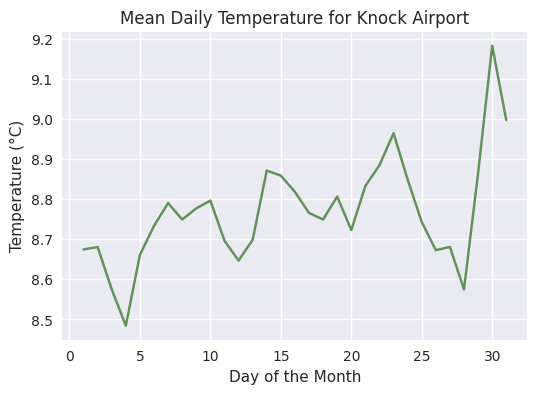

In [18]:
fig, ax = plt.subplots(figsize = (6,4))

# Plot the temperature by day of the month
plt.plot(temp_by_day, color = '#609256')

# Set the title and label the axis
plt.xlabel('Day of the Month')
plt.ylabel('Temperature (°C)')
plt.title('Mean Daily Temperature for Knock Airport')


# Display the plot
plt.show()

The above plots shows that usually the 31st of the month is the warmest day of the month. The 4th of the month is on average the coldest day of the month. 

## Task 3: Plot the Mean Temperature for Each Month

In [19]:
# Use resample() to group weather_df to monthly samples
monthly = weather_df.resample('ME')

In [20]:
# Calculate the mean of the monthly temperature
monthly_mean_temp = monthly['temp'].mean()
monthly_mean_temp

date
1996-07-31    12.650000
1996-08-31    12.949798
1996-09-30    12.175104
1996-10-31     9.724929
1996-11-30     4.912117
                ...    
2024-06-30    11.278194
2024-07-31    12.994489
2024-08-31    13.233333
2024-09-30    11.741389
2024-10-31     8.200000
Freq: ME, Name: temp, Length: 340, dtype: float64

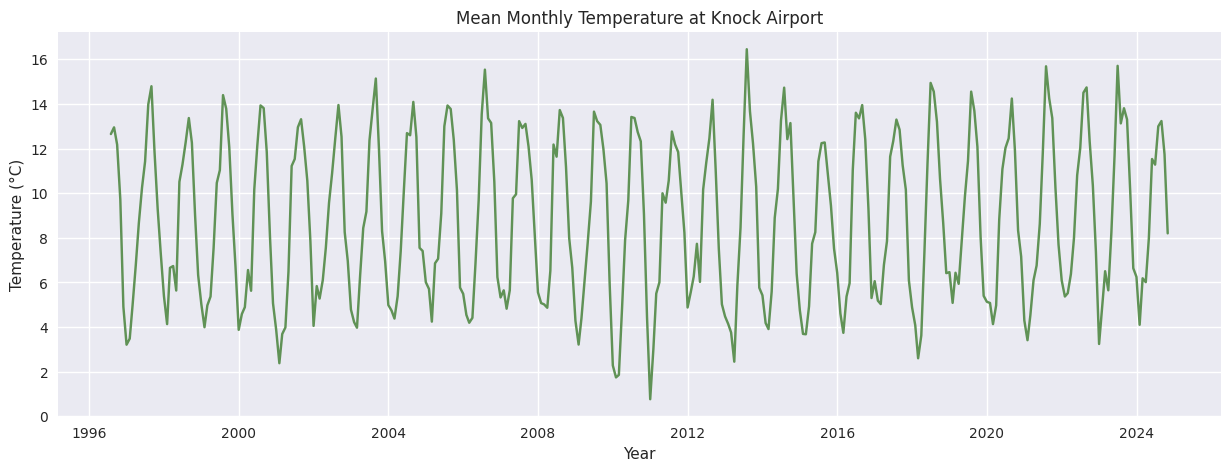

In [21]:
# Plot of the mean monthly temperatures.
fig, ax = plt.subplots(figsize = (15, 5))

# Plot mean monthly temperature
plt.plot(monthly_mean_temp, color = '#609256')

# Set the title and label the axis
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Mean Monthly Temperature at Knock Airport')

# Display the plot
plt.show()

The inspiration for the next plot came from a datacamp course, [Visualizing Time Series Sata in Python](https://app.datacamp.com/learn/courses/visualizing-time-series-data-in-python) that I completed to help me better understand how to plot time series data. 

THe plot shows the mean monthly temperature in Knock along with the minimum and maximum temperature recorded for each month.

In [22]:
# Select month from the index
index_month = weather_df.index.month

In [23]:
# Find the mean, min and max temp each month
temp_by_month = weather_df.groupby(index_month)['temp'].agg(['min', 'max', 'mean'])
print(temp_by_month)

      min   max       mean
date                      
1    -5.5  12.6   4.348502
2    -5.2  14.6   4.686452
3    -6.5  18.4   5.625178
4    -2.0  21.0   7.518934
5    -0.4  24.5  10.212284
6     2.6  28.5  12.366806
7     6.2  27.5  13.650432
8     0.0  27.7  13.561395
9     3.8  25.3  12.092413
10   -0.7  19.6   9.308653
11   -4.4  14.8   6.488077
12   -6.9  13.2   4.760484


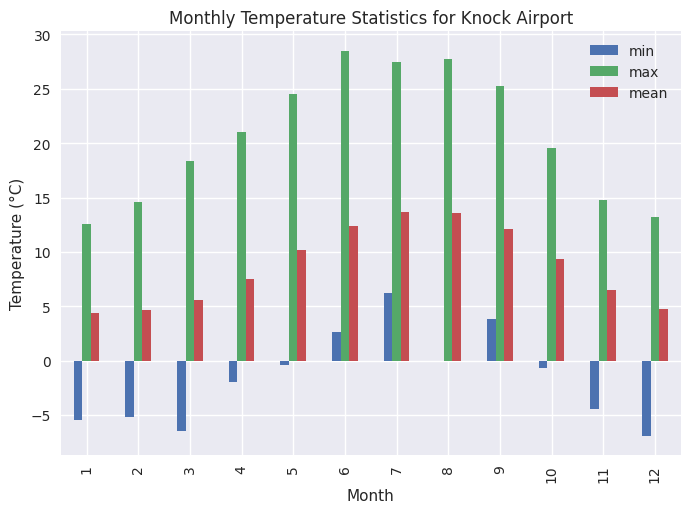

In [24]:
fig, ax = plt.subplots()

# Create a bar plot for the mean, max and min temperature for each month of the year
temp_by_month.plot(kind = 'bar', ax = ax)

# Labelling the plot
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Temperature Statistics for Knock Airport')

# Display the plot
plt.show()

## Task 4 Plot the Wind Speed

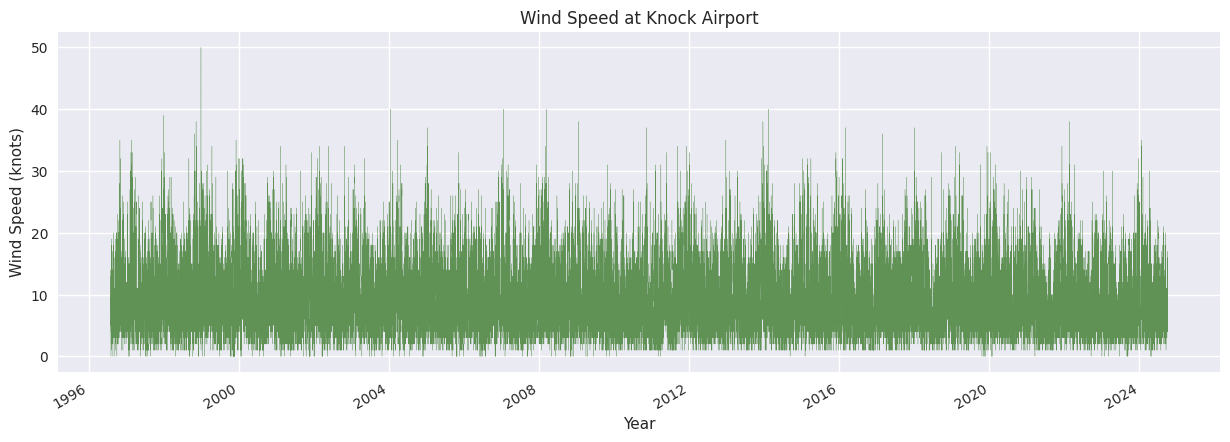

In [25]:
# Plot the wind speed
fig, ax = plt.subplots(figsize = (15, 5))

# Plotting the wind speed column
weather_df['wdsp'].plot(linewidth = 0.2, color = '#609256')

# Labelling the plot
plt.xlabel('Year')
plt.ylabel('Wind Speed (knots)')
plt.title('Wind Speed at Knock Airport')

plt.show()

As there are so many data points the plot of the wind speed at Knock Airport is not informative. 

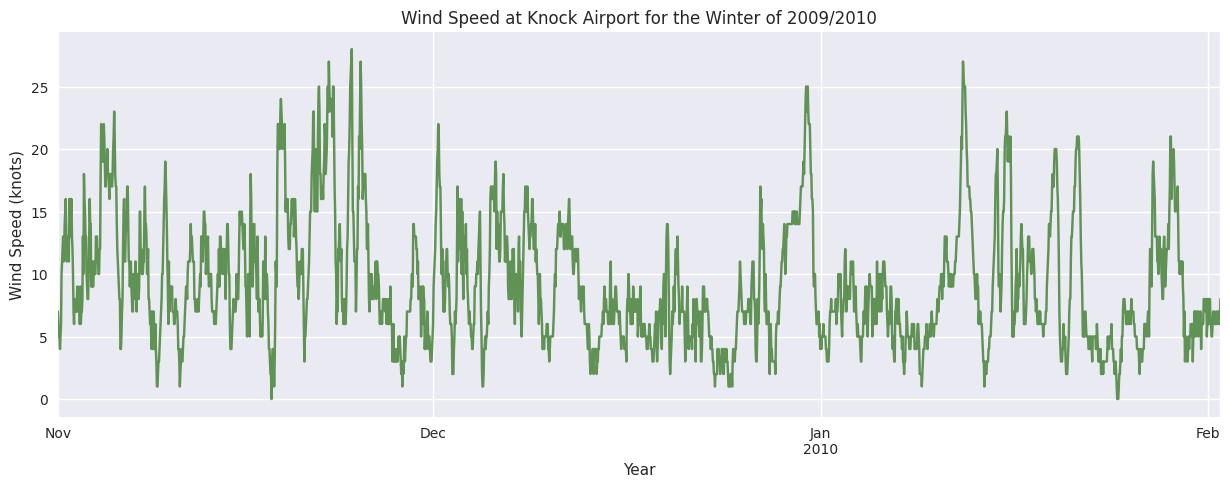

In [26]:
# Filtering weather_df
selected_weather_df = weather_df.loc['2009-11-01': '2010-02-01']

fig, ax = plt.subplots(figsize = (15, 5))

# Plot the wind speed for the winter of 2009/2010
selected_weather_df['wdsp'].plot(color = '#609256')

# Label the plot
plt.xlabel('Year')
plt.ylabel('Wind Speed (knots)')
plt.title('Wind Speed at Knock Airport for the Winter of 2009/2010')

plt.show()

These plots aren't particularly helpful to understand the wind speeds at Knock Airport. A more useful plot would be monthly statistics about the wind speeds such as the mean monthly wind speeds. This would give us information on the windiest and the least windiest months of the year. 

In [27]:
# What's the windiest month?
mean_wind_by_month = weather_df.groupby(index_month)['wdsp'].mean()

print(mean_wind_by_month)

date
1     10.473742
2     10.974979
3     10.118856
4      9.383730
5      9.187980
6      8.656994
7      8.170952
8      8.467532
9      8.830308
10     9.516281
11     9.583408
12    10.331941
Name: wdsp, dtype: float64


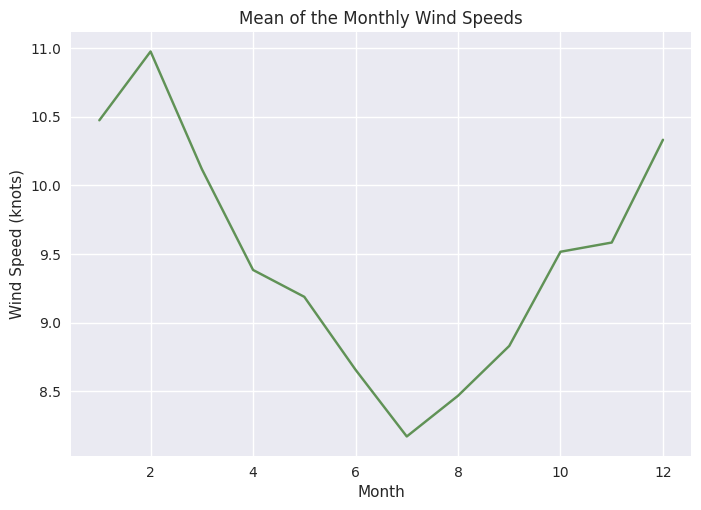

In [28]:
# Plot of the mean wind speed by month
mean_wind_by_month.plot(color = '#609256')

plt.xlabel('Month')
plt.ylabel('Wind Speed (knots)')
plt.title('Mean of the Monthly Wind Speeds')
plt.show()

July is, on average, the least windiest month and February is usually the windiest month with mean wind speeds of 11 knots. 

## Task 5 Plot the Rolling Wind Speed (over 24 hours).

The [rolling() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) is used to get the rolling mean, also known as the moving average for one or more columns. It is applied to time-series data and allows calculations over consecutive time intervals depending on the frequency of the time index. It has a parameter of window, which is the size in the number of data points to be included in each calculation. The rolling mean is calculated for each window as it moves through the time-series data. By default it produces NaN for the first few entries. 

__Additional References__

https://sparkbyexamples.com/pandas/pandas-rolling-mean-average-sum/

https://www.geeksforgeeks.org/how-to-make-a-time-series-plot-with-rolling-average-in-python/

In [29]:
# Rolling wind speed
rolling = weather_df['wdsp'].rolling(window='24h').mean()
rolling

date
1996-07-31 08:00:00    0.000000
1996-07-31 09:00:00    0.000000
1996-07-31 10:00:00    0.000000
1996-07-31 11:00:00    0.000000
1996-07-31 12:00:00    0.000000
                         ...   
2024-09-30 20:00:00    7.708333
2024-09-30 21:00:00    7.500000
2024-09-30 22:00:00    7.375000
2024-09-30 23:00:00    7.291667
2024-10-01 00:00:00    7.250000
Name: wdsp, Length: 246879, dtype: float64

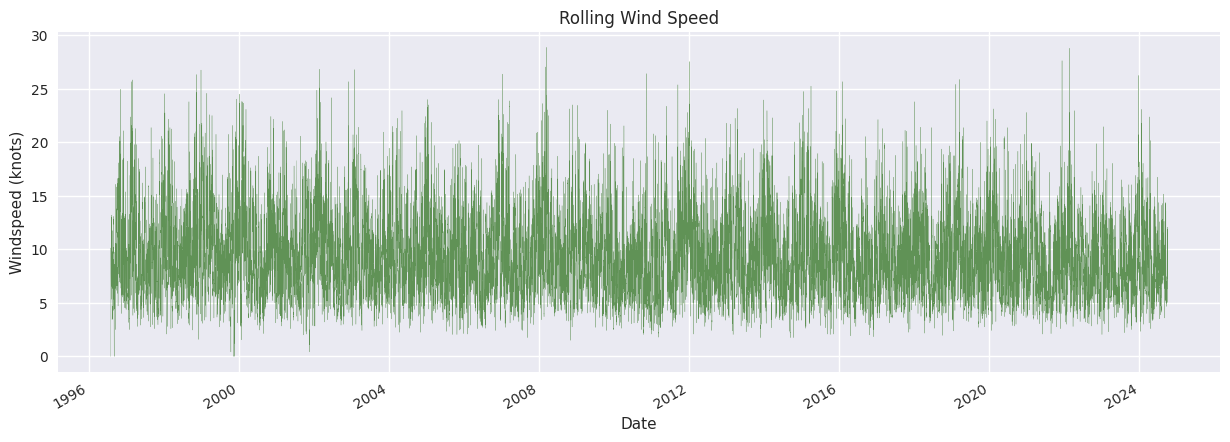

In [30]:
# Plot the data
rolling.plot(figsize= (15,5), linewidth = 0.2, color = '#609256')

# Label the axis
plt.title('Rolling Wind Speed')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')

plt.show()

### Plot of the Rolling Mean and Raw Data for November 2010

In [31]:
filter = weather_df.loc['2010-11', 'wdsp']

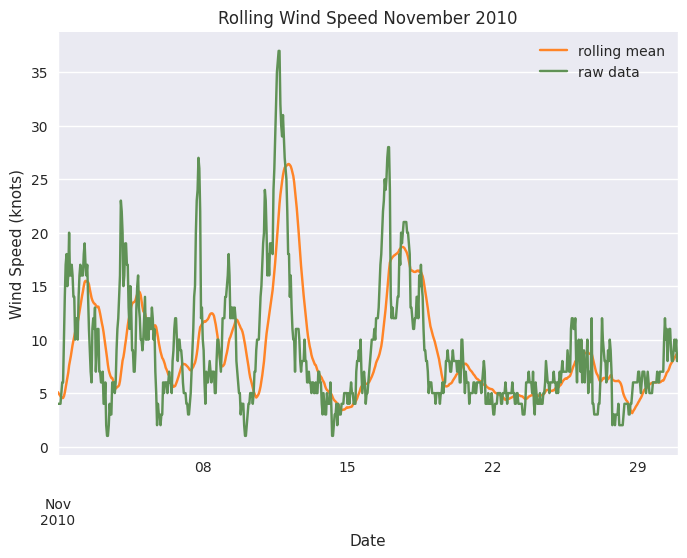

In [32]:
# Rolling mean for November 2010

# plot rolling mean for November 2010
nov_2010_rolling  = rolling['2010-11']

# Plot the rolling mean
nov_2010_rolling.plot(color = '#FF8427')

# Plot the raw data
filter.plot(color = '#609256')

# Set title and label axis
plt.title('Rolling Wind Speed November 2010')
plt.xlabel('Date')
plt.ylabel('Wind Speed (knots)')

# Add legend to the plot
legend = ['rolling mean', 'raw data']
plt.legend(legend)

# Display the plot
plt.show()

## Task 6 Plot the Max Wind Speed for Each Day

In [33]:
# Max wind speed for each day from the daily resampled data.
max_daily_windspeed = daily['wdsp'].max()

max_daily_windspeed

date
1996-07-31     0
1996-08-01    14
1996-08-02    13
1996-08-03    10
1996-08-04    18
              ..
2024-09-27    15
2024-09-28     8
2024-09-29    17
2024-09-30    12
2024-10-01     6
Freq: D, Name: wdsp, Length: 10290, dtype: int64

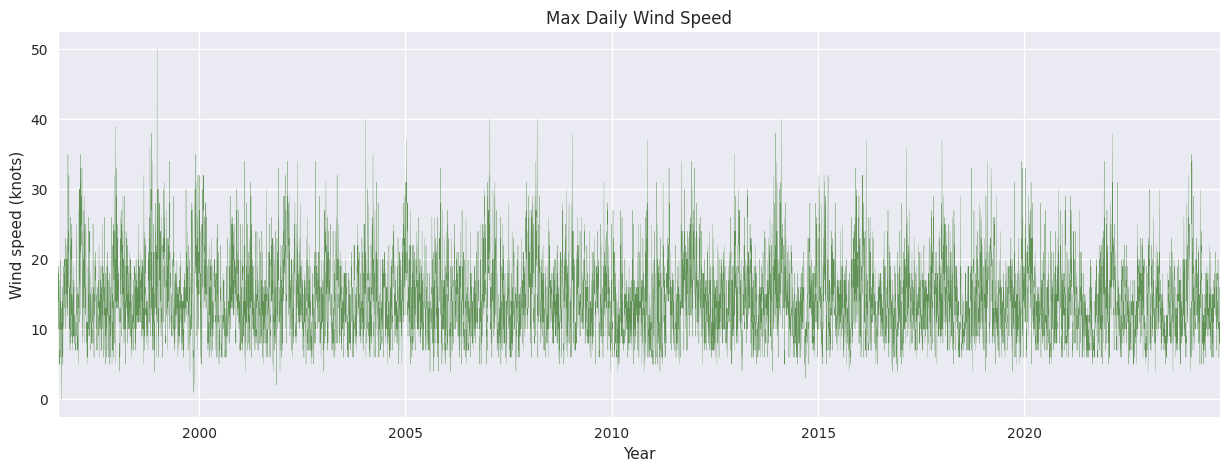

In [34]:
# Plot of the Max Daily Wind Speed
fig, ax = plt.subplots(figsize = (15, 5))

# Plot the maximum daily wind speed
max_daily_windspeed.plot(linewidth = 0.2, color = '#609256')

# Label the plot
plt.xlabel('Year')
plt.ylabel('Wind speed (knots)')
plt.title('Max Daily Wind Speed')

# Display the plot
plt.show()

## Task 7 Plot the Monthly Mean of the Daily Max Wind Speed.

In [35]:
# Convert the max_daily_windspeed to a Dataframe
max_daily_windspeed_df = pd.DataFrame(max_daily_windspeed)
max_daily_windspeed_df

,wdsp
date,
1996-07-31,0
1996-08-01,14
1996-08-02,13
1996-08-03,10
1996-08-04,18
...,...
2024-09-27,15
2024-09-28,8
2024-09-29,17


In [36]:
# Resample the daily max wind speeds df to monthly
mean_max_monthly = max_daily_windspeed_df.resample('ME')

In [37]:
# Get the Mean of the Max Monthly Wind speed
monthly_mean_max_wdsp = mean_max_monthly['wdsp'].mean()
monthly_mean_max_wdsp.head()

date
1996-07-31     0.000000
1996-08-31    12.516129
1996-09-30    12.266667
1996-10-31    18.193548
1996-11-30    17.133333
Freq: ME, Name: wdsp, dtype: float64

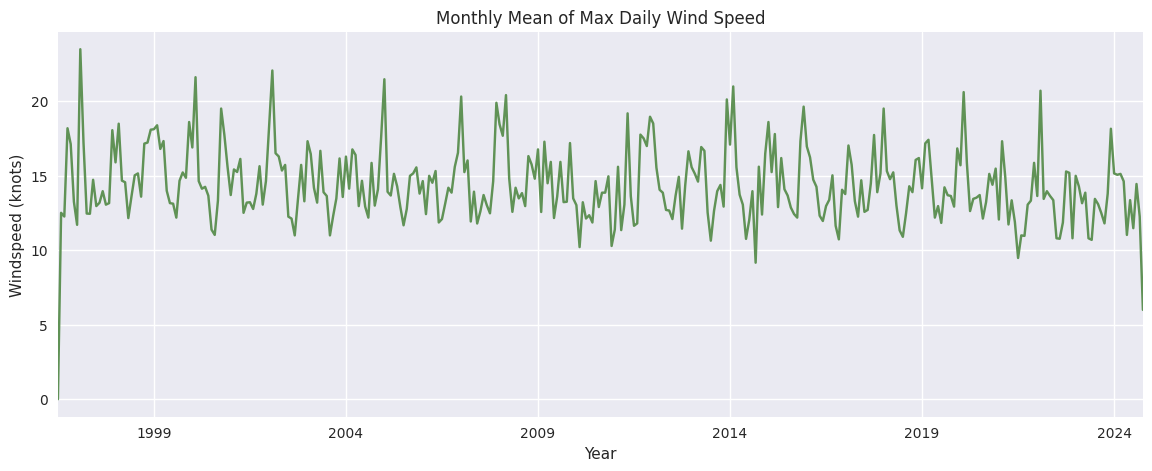

In [38]:
fig, ax = plt.subplots(figsize = (14, 5))

monthly_mean_max_wdsp.plot(color = '#609256')
plt.xlabel('Year')
plt.ylabel('Windspeed (knots)')
plt.title('Monthly Mean of Max Daily Wind Speed')
plt.show()

To view the data by the month of the year.

In [39]:
# Using datetime functionality to extract the month from max_daily_windspeed_df
index_month = max_daily_windspeed_df.index.month

In [40]:
mean_max_wdsp = max_daily_windspeed_df.groupby(index_month)['wdsp'].mean()
mean_max_wdsp

date
1     16.081797
2     16.738306
3     15.369816
4     14.234524
5     13.739631
6     13.036905
7     12.486766
8     12.886541
9     13.439080
10    14.528193
11    14.905952
12    15.930876
Name: wdsp, dtype: float64

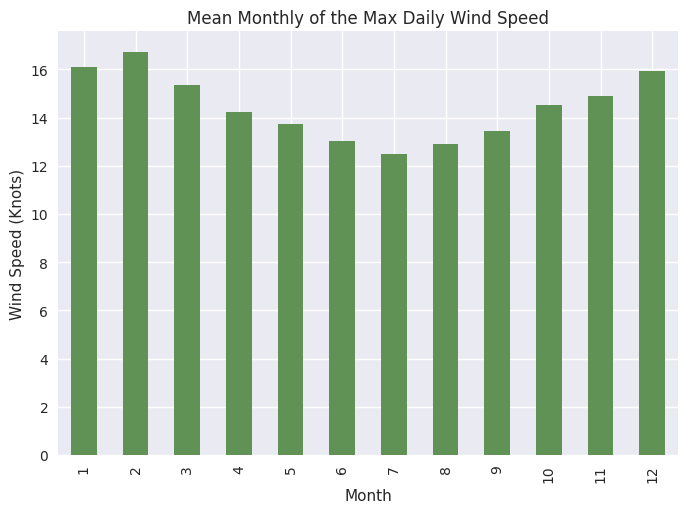

In [41]:
fig, ax = plt.subplots()

# Create a bar plot for the monthly mean of the daily max wind speed.
mean_max_wdsp.plot(kind = 'bar', ax = ax, color = '#609256')

# Label the plot
plt.xlabel('Month')
plt.ylabel('Wind Speed (Knots)')
plt.title('Mean Monthly of the Max Daily Wind Speed')

# Display the plot
plt.show()

### End

***